# Problem Statement
## Perform clustering (Hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
### Draw the inferences from the clusters obtained

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import silhouette_score as sil
import warnings
warnings.filterwarnings('ignore')
!pip install yellowbrick


In [2]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

# EDA And Feature Engineering

In [6]:
df=df.rename({"ID#":"ID","Award?":"Award"},axis=1)

# Visualization of Data using Histogram

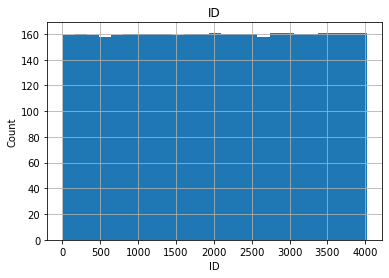

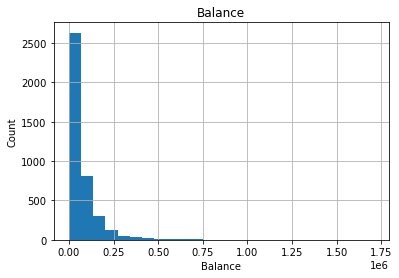

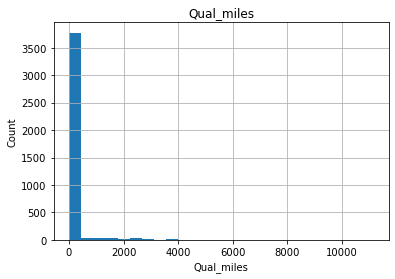

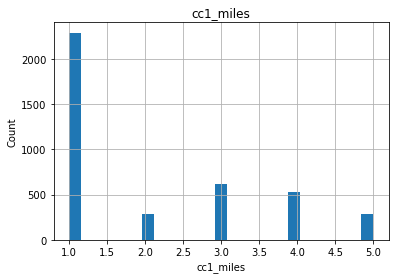

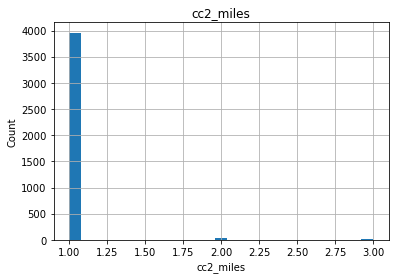

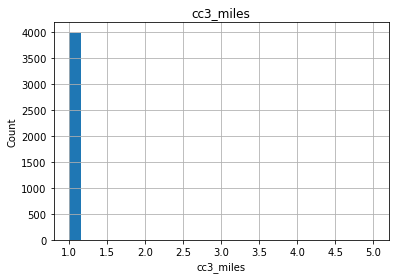

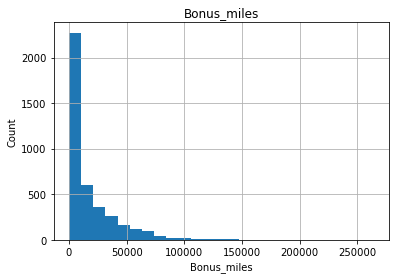

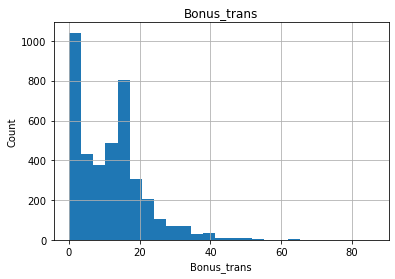

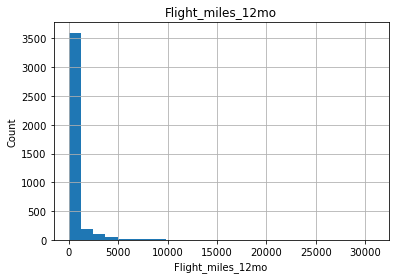

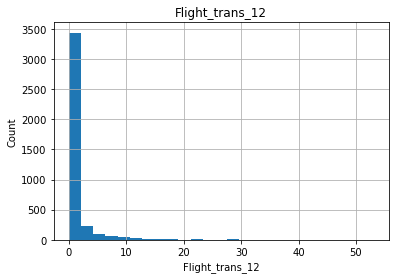

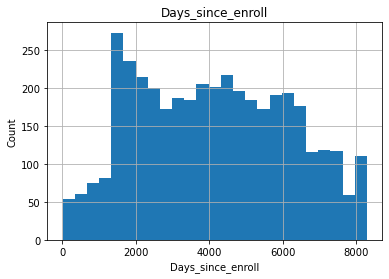

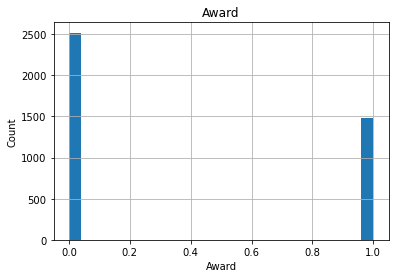

In [7]:
for feature in df:
    data = df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


# Boxplot

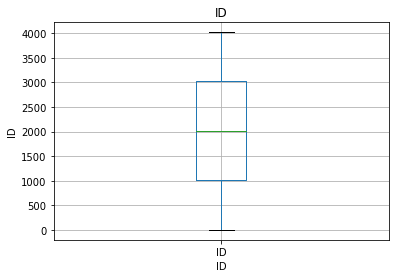

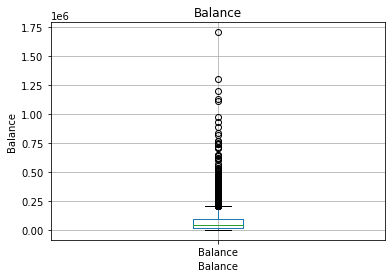

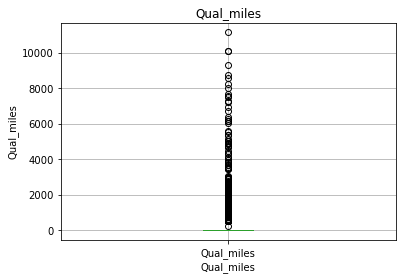

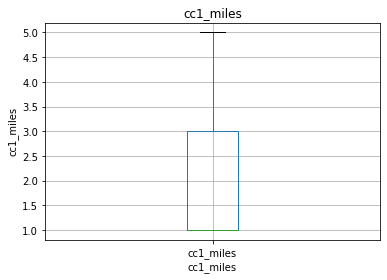

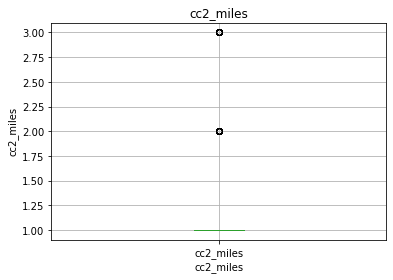

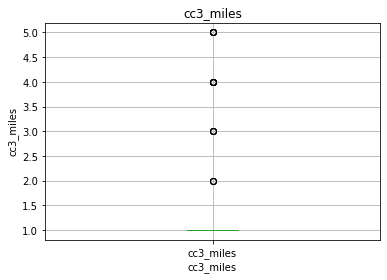

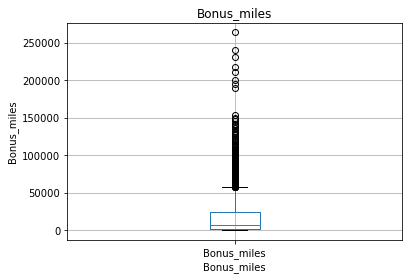

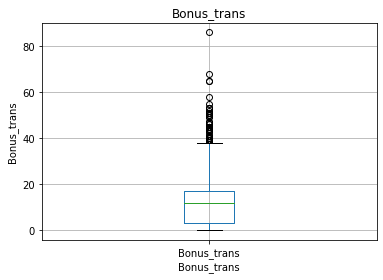

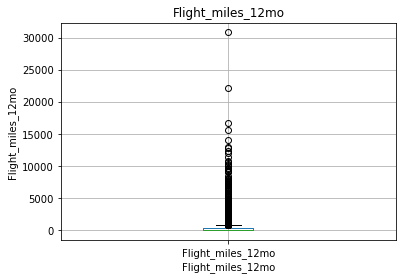

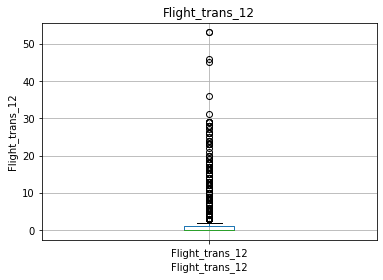

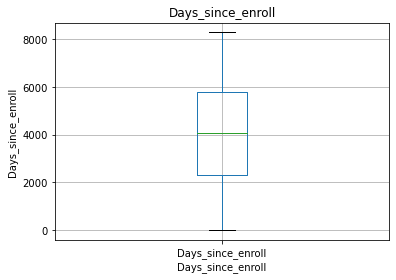

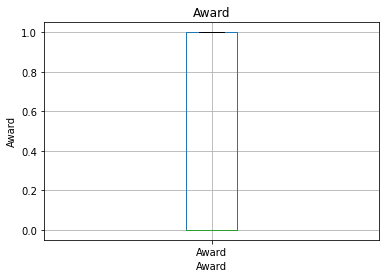

In [8]:
for feature in df:
    data = df.copy()
    data.boxplot(column=feature)
    plt.xlabel(feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


# Obseravtion : 
We can see an lot of outliers in the dataset

# Transformation of Data into MinMax scaler

In [9]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
df_norm = norm_func(df.iloc[:,0:])
df_norm

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [11]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster .hierarchy import linkage

# Dendrogram using Complete Linkage

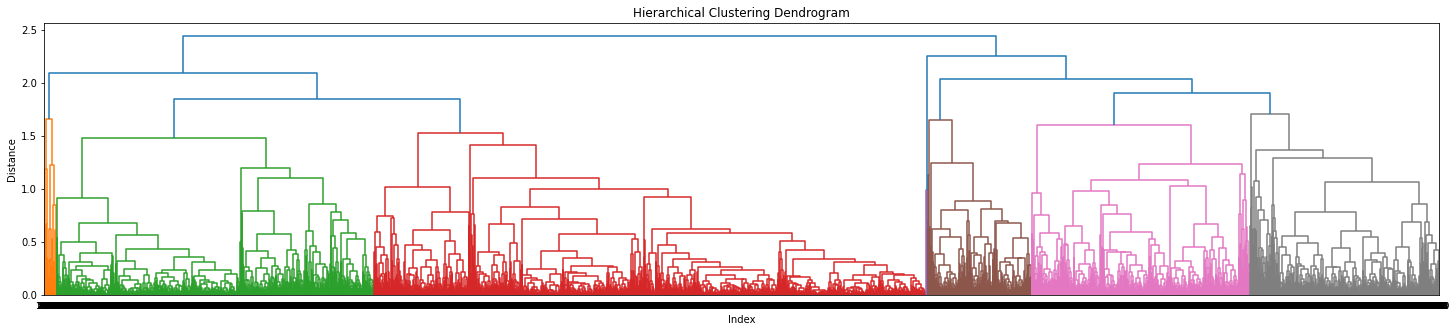

In [12]:
z = linkage(df_norm, method="complete",metric="euclidean")

plt.figure(figsize=(25, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0., 
    leaf_font_size=8., 
)
plt.show()

# Observation :
We can see in complete linkage they are showing to make 7 clusters

# Dedrogram using Average linkage

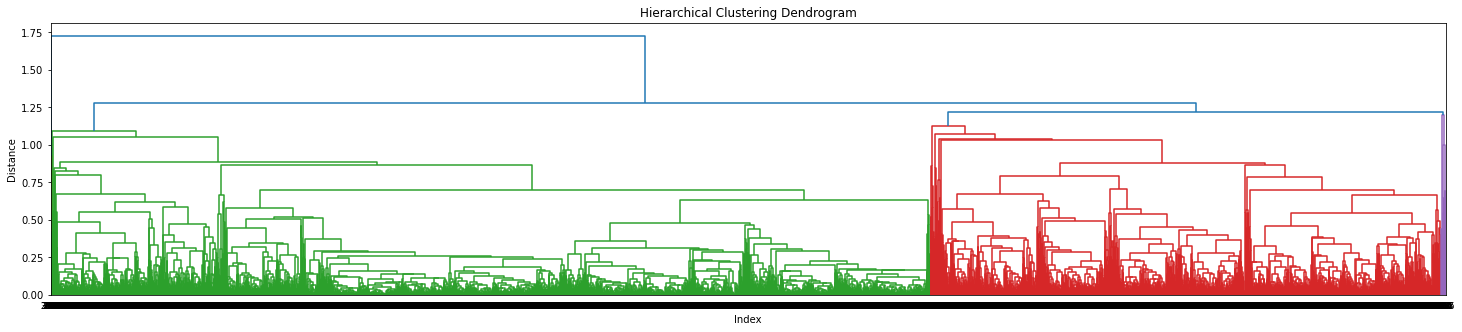

In [13]:
z1 = linkage(df_norm, method="average",metric="euclidean")

plt.figure(figsize=(25, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z1,
    leaf_rotation=0., 
    leaf_font_size=8., 
)
plt.show()

# Observation : 
we can see in average linkage the dedrogram is showing to make an 3 clusters

# Dendrogram using Single Linkage

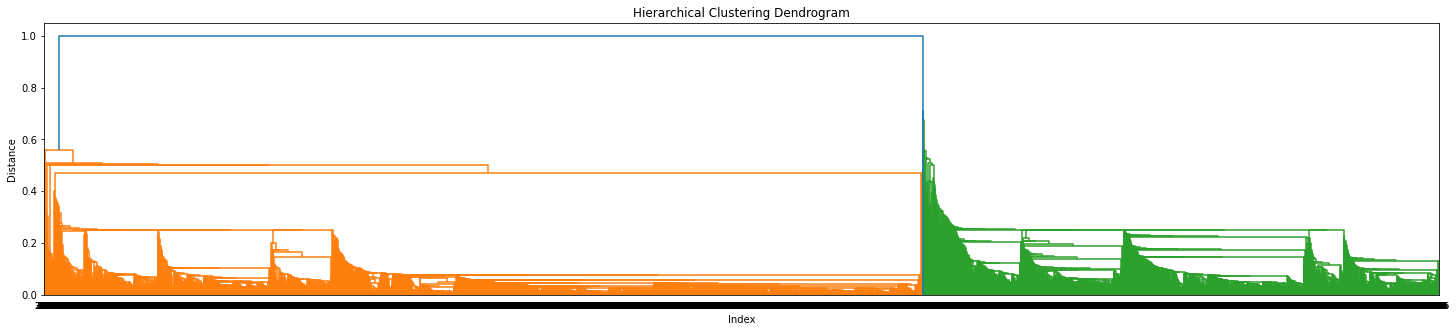

In [14]:
z2 = linkage(df_norm, method="single",metric="euclidean")

plt.figure(figsize=(25, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z2,
    leaf_rotation=0., 
    leaf_font_size=8., 
)
plt.show()

# Observation:
In single linkage also the dedrogram is showing to make an 3 different clusters

# Silhouette Score For Hierarchical

In [12]:
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels1 = hie_cluster1.fit_predict(df_norm)
        silhouette_score1 = sil(df_norm, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- complete : 0.46765873557390897
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4356499222984323
For n_clusters = 2 The average silhouette_score with linkage- single : 0.47019703947427155

For n_clusters = 3 The average silhouette_score with linkage- complete : 0.4658447823503042
For n_clusters = 3 The average silhouette_score with linkage- average : 0.46834199629175055
For n_clusters = 3 The average silhouette_score with linkage- single : 0.4694358885826447

For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4121977176126768
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4383910691189487
For n_clusters = 4 The average silhouette_score with linkage- single : 0.40760137338826635

For n_clusters = 5 The average silhouette_score with linkage- complete : 0.32959706073857964
For n_clusters = 5 The average silhouette_score with linkage- average : 0.4245703

# Observation : 
After validation of cluster using Silhouette Score method in all the three methods i.e. single,average and complete linkage after 5 clusters they are showing significant scores

# Using Complete Linkage method

In [13]:
hc = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean',linkage = 'complete')

In [14]:
y_hc = hc.fit_predict(df_norm)

In [15]:
df["cluster_id"] = y_hc

In [16]:
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [17]:
df.iloc[:,0:].groupby(['cluster_id']).mean().apply(lambda x: tuple(x))

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster_id,,,,,,,,,,,,
0,2014.272027,90920.413174,176.971771,2.994867,1.005988,1.021386,33532.760479,16.643285,772.680924,2.332763,4151.118905,1.000000
1,2170.906137,59971.432010,88.480947,1.712395,1.000401,1.008825,10215.097473,9.096270,227.057361,0.653028,3823.422383,0.000000
2,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
3,2113.857143,55387.685714,28.571429,1.028571,2.428571,1.000000,14254.571429,16.342857,398.657143,1.771429,4139.228571,0.285714
4,684.607383,121041.607383,491.486577,1.409396,1.000000,1.006711,10519.322148,11.456376,928.362416,2.949664,6483.204698,1.000000


In [18]:
df.iloc[:,0:].groupby(['cluster_id']).count().apply(lambda x: tuple(x))

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster_id,,,,,,,,,,,,
0,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169
1,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493
2,4,4,4,4,4,4,4,4,4,4,4,4
3,35,35,35,35,35,35,35,35,35,35,35,35
4,298,298,298,298,298,298,298,298,298,298,298,298


# Observation :
After making 5 clusters we can see that most of the data are in 0 and 1 clusters 

# Barplot Using Hierarchical Clustering

<AxesSubplot:xlabel='cluster_id', ylabel='ID'>

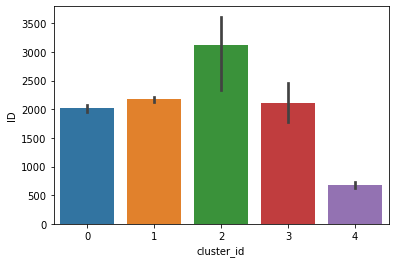

In [19]:
sns.barplot('cluster_id','ID',data=df)

# Observation:
In ID most of data are in cluster 2 and they are having outlier as well

<AxesSubplot:xlabel='cluster_id', ylabel='Balance'>

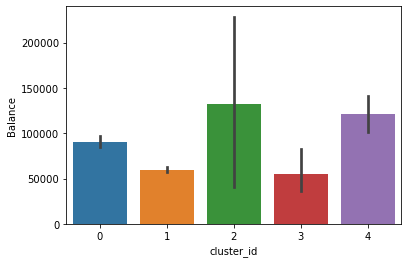

In [20]:
sns.barplot('cluster_id','Balance',data=df)

# Observation:
In balance most of the data are in cluster 2 and in cluster are having most numbers of outliers

<AxesSubplot:xlabel='cluster_id', ylabel='Qual_miles'>

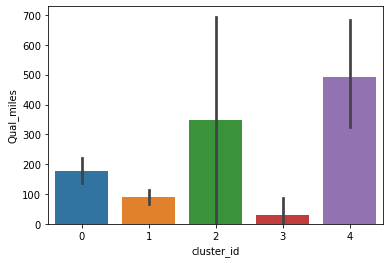

In [21]:
sns.barplot('cluster_id','Qual_miles',data=df)

# Observation :
In qual_miles in cluster 4 are having most numbers of data but in cluster 2 are having most nyumber of outliers

<AxesSubplot:xlabel='cluster_id', ylabel='cc1_miles'>

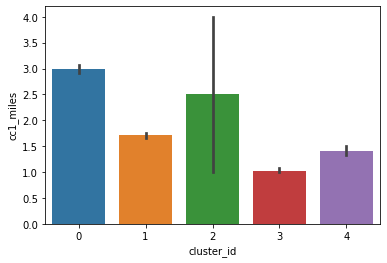

In [22]:
sns.barplot('cluster_id','cc1_miles',data=df)

# Observation :
In cc1_miles the cluster 0 are having more data points but the cluster 2 are having more numbers of outliers

<AxesSubplot:xlabel='cluster_id', ylabel='cc2_miles'>

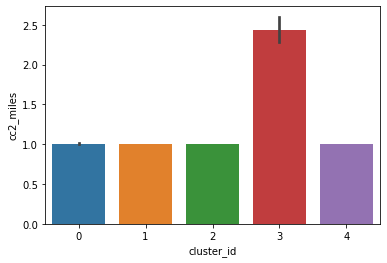

In [23]:
sns.barplot('cluster_id','cc2_miles',data=df)

# Observation:
In cc2_ miles the most number of data are in cluster 3

<AxesSubplot:xlabel='cluster_id', ylabel='cc3_miles'>

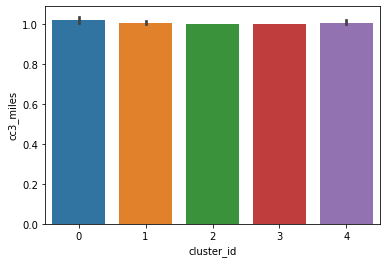

In [24]:
sns.barplot('cluster_id','cc3_miles',data=df)

# Observation:
In cc3_ miles there are equal number number of data in all clusters

<AxesSubplot:xlabel='cluster_id', ylabel='Bonus_miles'>

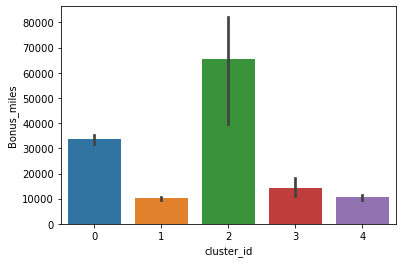

In [25]:
sns.barplot('cluster_id','Bonus_miles',data=df)

# Observation:
In Bonus_miles more number of data are in cluster 2 and cluster are having outliers

<AxesSubplot:xlabel='cluster_id', ylabel='Bonus_trans'>

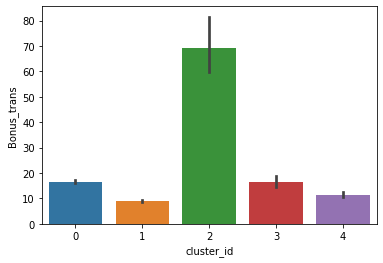

In [26]:
sns.barplot('cluster_id','Bonus_trans',data=df)

# Observation:
In Bonus-trans more number of data sre in cluster 2

<AxesSubplot:xlabel='cluster_id', ylabel='Flight_miles_12mo'>

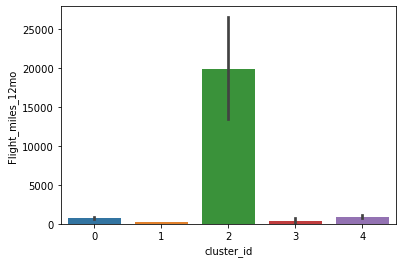

In [27]:
sns.barplot('cluster_id','Flight_miles_12mo',data=df)

# Observation:
In Flight_miles_12mo the most number of data are in cluster 2 and they are having outliers

<AxesSubplot:xlabel='cluster_id', ylabel='Flight_trans_12'>

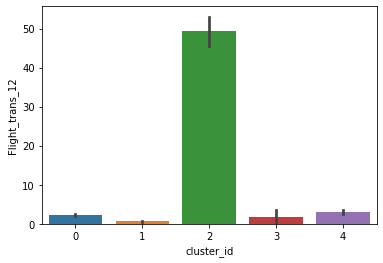

In [28]:
sns.barplot("cluster_id","Flight_trans_12",data=df)

# Observation:
In Flight_trans_12 most of the data are in cluster 2

<AxesSubplot:xlabel='cluster_id', ylabel='Days_since_enroll'>

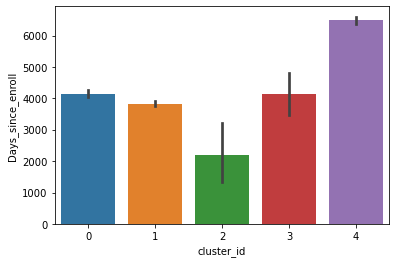

In [29]:
sns.barplot('cluster_id','Days_since_enroll',data=df)

# Observation:
In Days_since_enroll most of the data are cluster 4

<AxesSubplot:xlabel='cluster_id', ylabel='Award'>

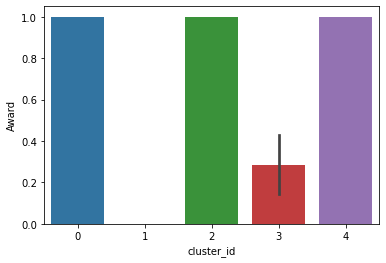

In [30]:
sns.barplot("cluster_id","Award",data=df)

# Observation :
In Award cluster 0,cluster 2,and cluster 4 are having equal number of data but in cluster 1 and cluster 3 they are having less data

# K Means

In [31]:
from sklearn.cluster import KMeans

In [32]:
df.drop('cluster_id',axis=1,inplace=True)
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


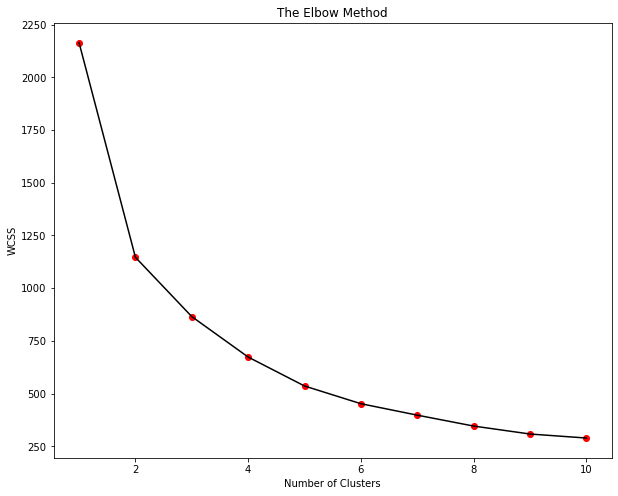

In [33]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS

plt.plot(range(1, 11), WCSS,color = 'black')
plt.scatter(range(1,11),WCSS,color = 'red')
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

# Observation:
In k-means clustering using elbow method as we can see that the number of cluster are showing 6 and after 6 the graph looks stagnant

In [34]:
clf = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf.fit_predict(df_norm)

In [35]:
y_kmeans

array([1, 1, 1, ..., 0, 4, 4])

In [36]:
clf.cluster_centers_

array([[ 7.42164968e-01,  3.51248578e-02,  1.87119145e-02,
         2.24101480e-01,  1.26849894e-02,  3.90312782e-18,
         5.69863835e-02,  1.51433207e-01,  2.70305351e-02,
         4.72695361e-02,  3.02407915e-01,  1.00000000e+00],
       [ 2.90790550e-01,  2.91376543e-02,  8.10185185e-03,
         2.95138889e-02,  8.68055556e-03,  2.89351852e-04,
         1.28416894e-02,  7.93496985e-02,  7.85524975e-03,
         1.35831586e-02,  6.71431797e-01,  1.27675648e-15],
       [ 4.04765766e-01,  7.38484569e-02,  6.18416471e-03,
         6.66206262e-01,  9.20810313e-04,  6.44567219e-03,
         1.25283911e-01,  2.01593216e-01,  7.32518842e-03,
         1.23701310e-02,  5.77744412e-01, -4.44089210e-16],
       [ 3.10113254e-01,  7.19287565e-02,  1.87937229e-02,
         7.70574534e-01,  7.76397516e-04,  8.15217391e-03,
         1.91363919e-01,  2.41549906e-01,  2.52293291e-02,
         4.38884331e-02,  6.60646325e-01,  1.00000000e+00],
       [ 8.00672157e-01,  2.07560121e-02,  8.4867474

In [37]:
md = pd.Series(y_kmeans)
df['Cluster']=md

In [38]:
df.iloc[:,0:].groupby(['Cluster']).mean().apply(lambda x: tuple(x))

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Cluster,,,,,,,,,,,,
0,2984.503171,59882.192389,208.600423,1.896406,1.025370,1.000000,15026.454545,13.023256,833.000000,2.505285,2510.171247,1.0
1,1169.978009,49674.980324,90.319444,1.118056,1.017361,1.001157,3386.160880,6.824074,242.075231,0.719907,5570.855324,0.0
2,1628.158379,125899.655617,68.941068,3.664825,1.001842,1.025783,33035.488029,17.337017,225.740331,0.655617,4793.812155,0.0
3,1247.655280,122626.877329,209.512422,4.082298,1.001553,1.032609,50459.795031,20.773292,777.492236,2.326087,5481.400621,1.0
4,3219.702070,35385.638164,94.610261,1.204320,1.017102,1.006301,4400.907291,6.941494,214.288029,0.598560,1983.927093,0.0
5,1016.656593,100108.744505,335.541209,1.142857,1.027473,1.016484,8805.763736,10.538462,1030.892857,3.206044,5858.197802,1.0


In [39]:
df.iloc[:,0:].groupby(['Cluster']).count().apply(lambda x: tuple(x))

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Cluster,,,,,,,,,,,,
0,473,473,473,473,473,473,473,473,473,473,473,473
1,864,864,864,864,864,864,864,864,864,864,864,864
2,543,543,543,543,543,543,543,543,543,543,543,543
3,644,644,644,644,644,644,644,644,644,644,644,644
4,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111
5,364,364,364,364,364,364,364,364,364,364,364,364


# Observation :
The most numbers of data are in cluster 2 and cluster 4 rest all the cluster are properly divided

# Silhouette Score

In [40]:
from sklearn.metrics import silhouette_score as sil
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer

model


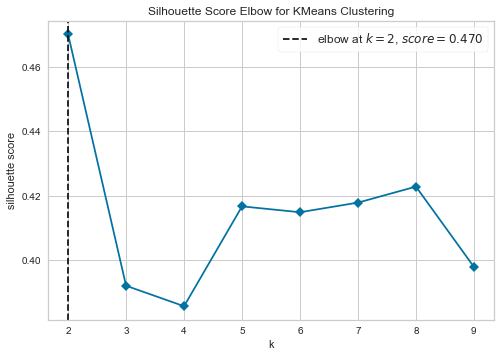

In [41]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10,max_iter=500, n_init=20,)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model')
visualizer1.fit(df_norm)    
visualizer1.poof()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.47019703947427155
For n_clusters = 3 The average silhouette_score is : 0.3918715697508911
For n_clusters = 4 The average silhouette_score is : 0.3855434856354565
For n_clusters = 5 The average silhouette_score is : 0.4166386993706997
For n_clusters = 6 The average silhouette_score is : 0.41481379811626945
For n_clusters = 7 The average silhouette_score is : 0.41781103096149724
For n_clusters = 8 The average silhouette_score is : 0.42279094434684605
For n_clusters = 9 The average silhouette_score is : 0.39740002118054313


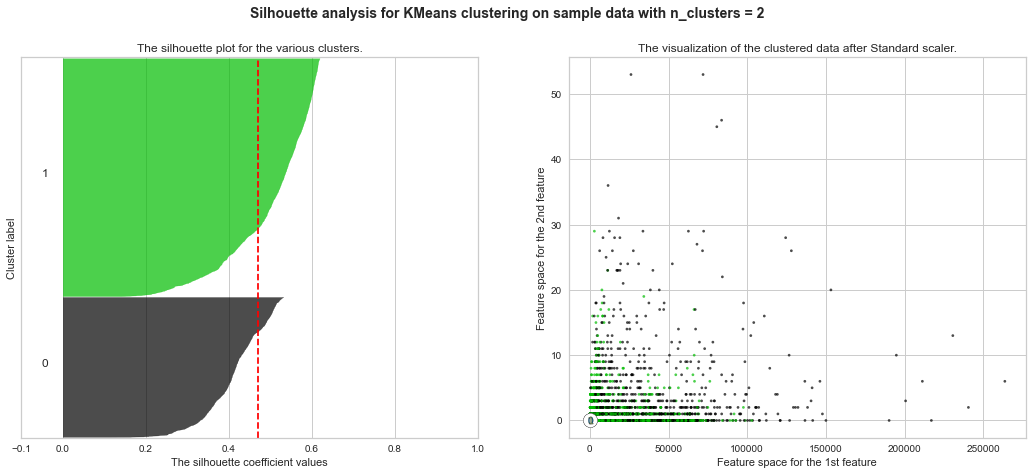

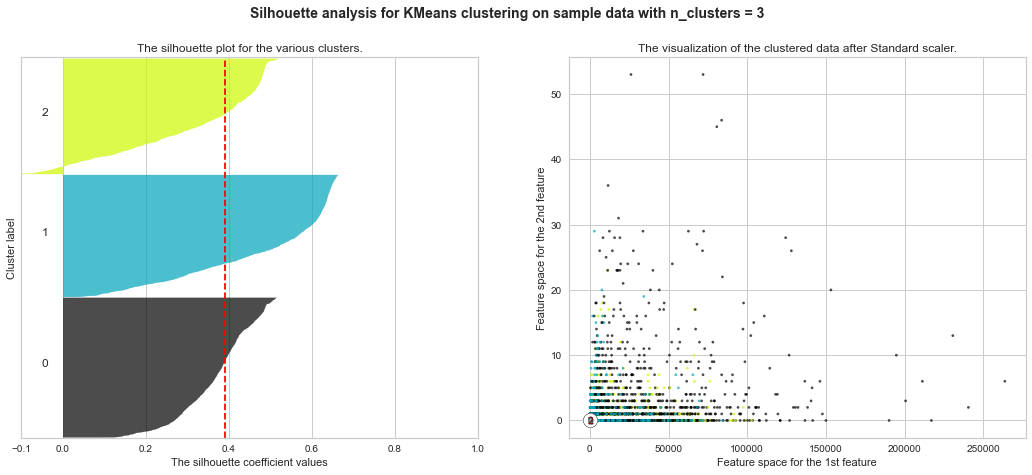

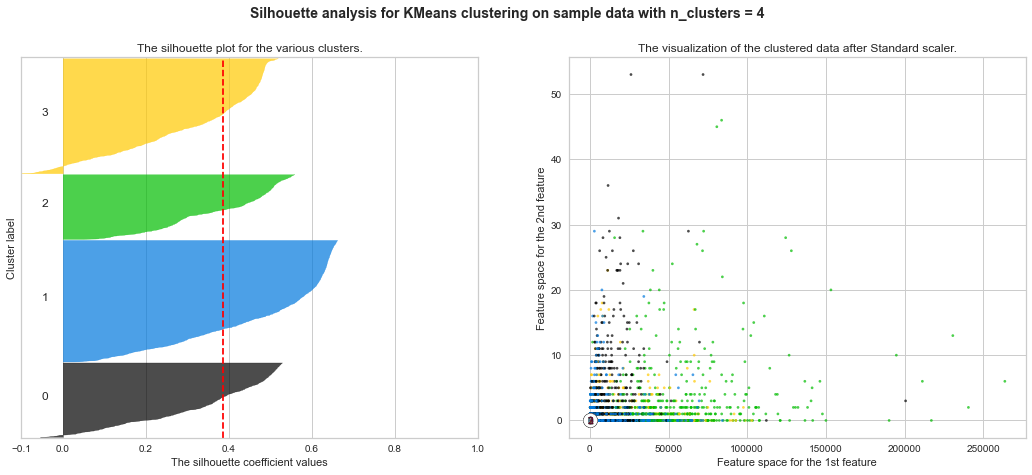

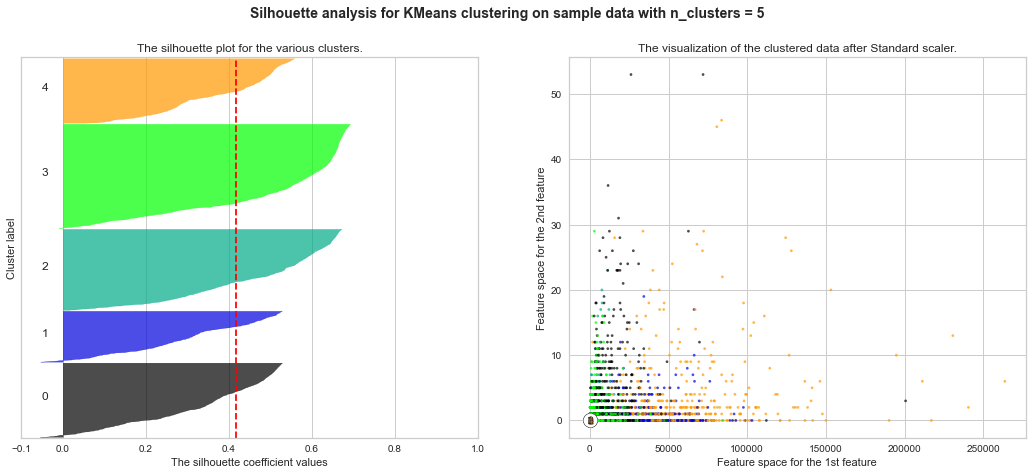

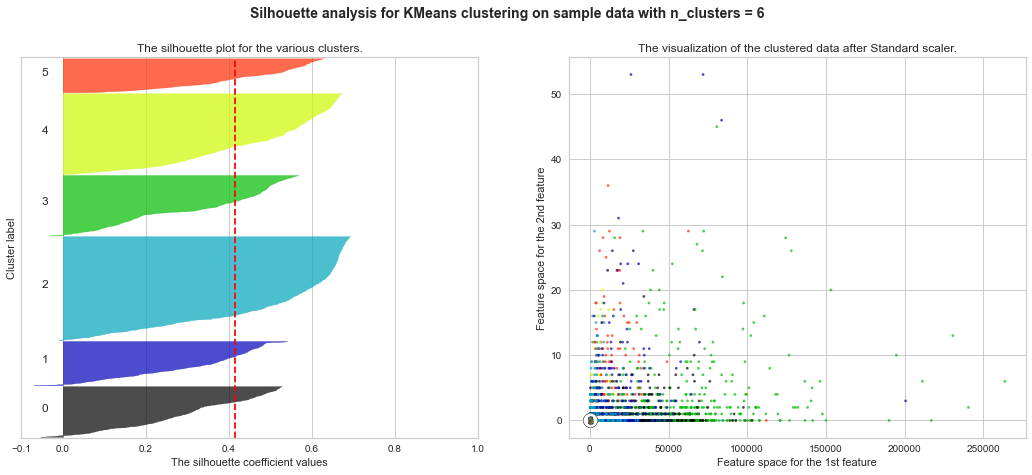

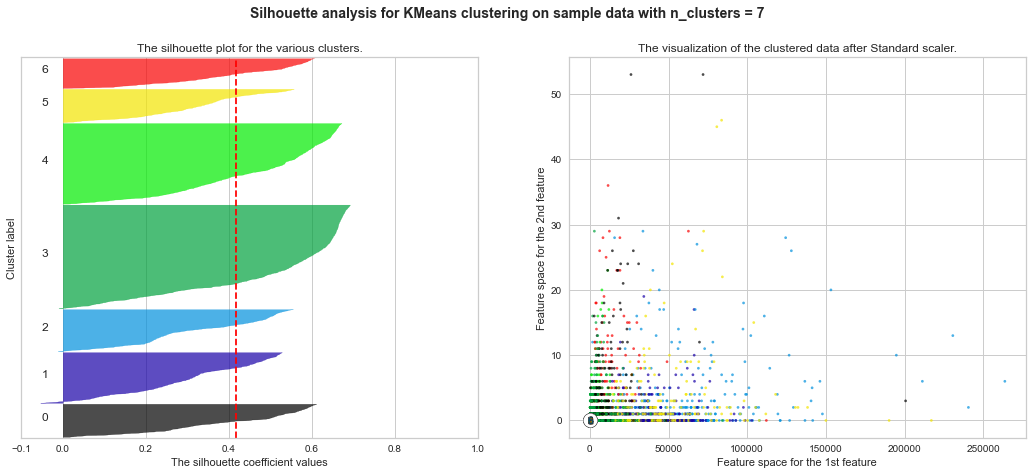

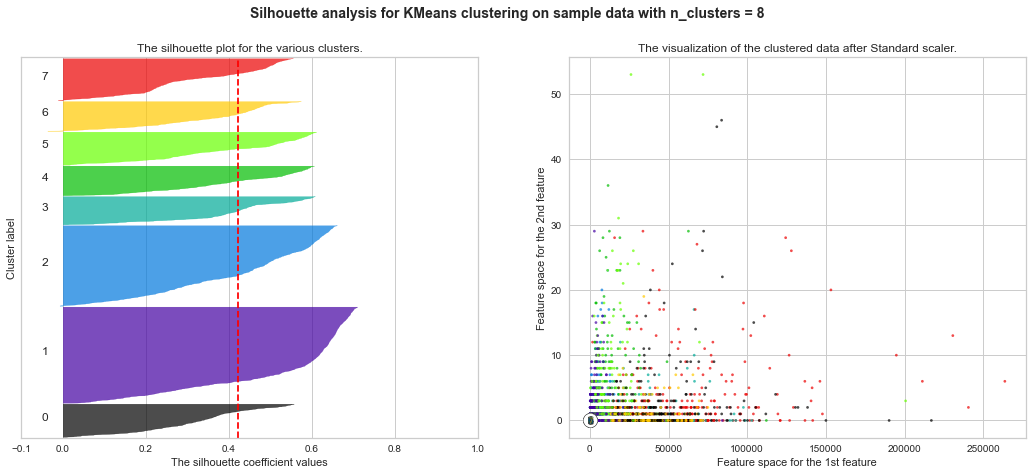

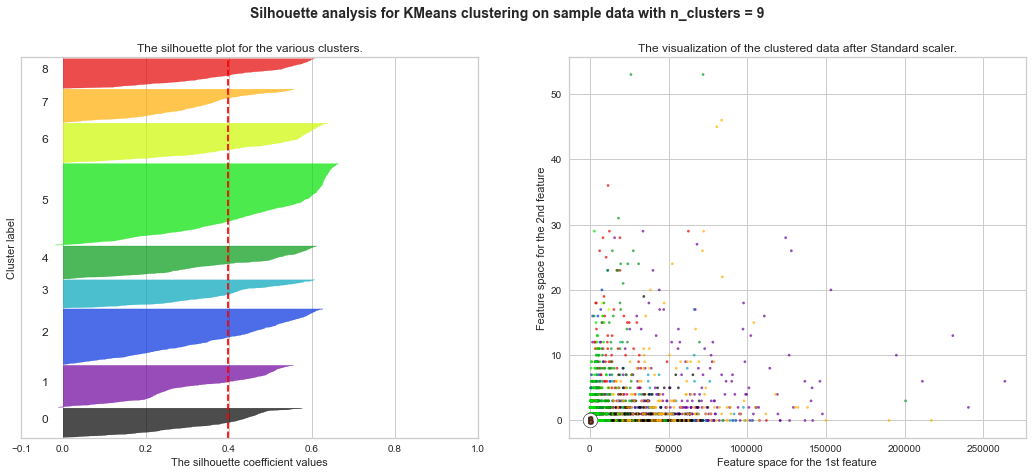

In [42]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(df_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
  # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data.iloc[:,6], data.iloc[:,9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


In [43]:
sc_score = []
for i in range_n_clusters:
    km = KMeans(i)
    y = km.fit_predict(df_norm.iloc[:,0:])
    sc_score.append(sil(df_norm.iloc[:,0:],y))

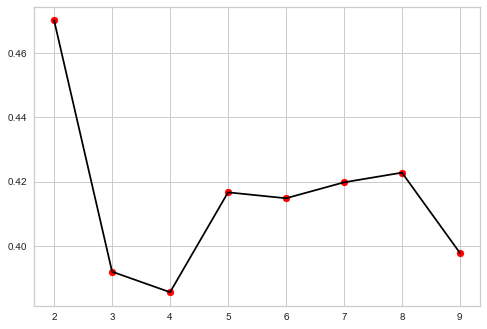

In [44]:
plt.plot(range_n_clusters,sc_score,color ='black')
plt.scatter(range_n_clusters,sc_score,color ='red')
plt.show()

# Barplot using K-Means Clustering

<AxesSubplot:xlabel='Cluster', ylabel='ID'>

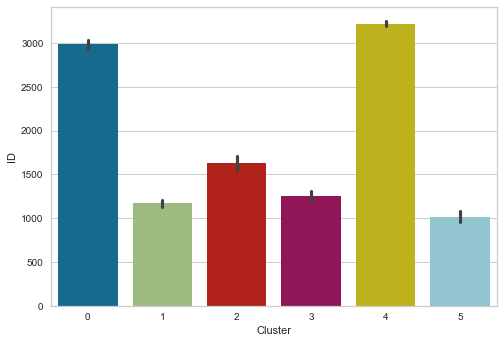

In [45]:
sns.barplot("Cluster","ID",data=df)

# Observation:
In ID most number of data are inc cluster 2 and cluster 4

<AxesSubplot:xlabel='Cluster', ylabel='Balance'>

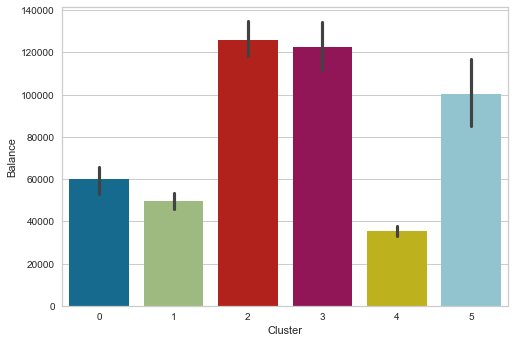

In [46]:
sns.barplot("Cluster","Balance",data=df)

# Observation:
In balance most number of data are in cluster 2 and 3

<AxesSubplot:xlabel='Cluster', ylabel='Qual_miles'>

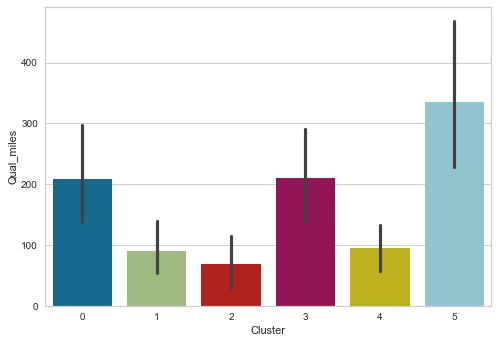

In [47]:
sns.barplot("Cluster","Qual_miles",data=df)

# Observation:
In Qual_miles most of data are in cluster 5 and having outliers

<AxesSubplot:xlabel='Cluster', ylabel='cc1_miles'>

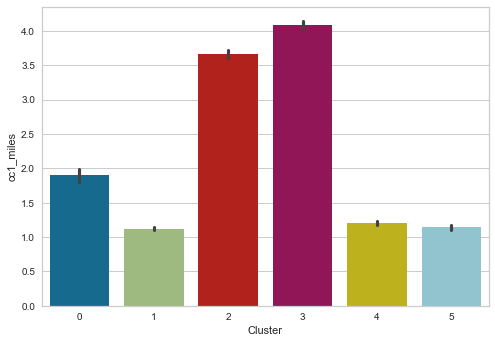

In [48]:
sns.barplot("Cluster","cc1_miles",data=df)

# Observation:
In cc1_miles most number of data are in cluster 3

<AxesSubplot:xlabel='Cluster', ylabel='cc2_miles'>

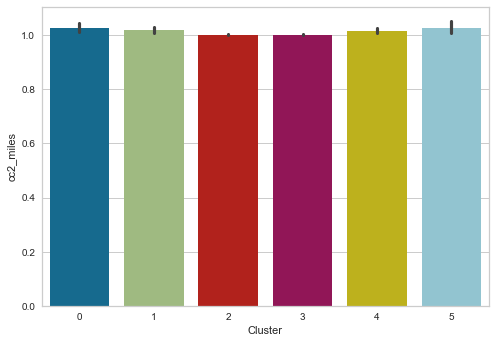

In [49]:
sns.barplot("Cluster","cc2_miles",data=df)

# Observation
In cc2_miles equal number of data are in each clusters

<AxesSubplot:xlabel='Cluster', ylabel='cc3_miles'>

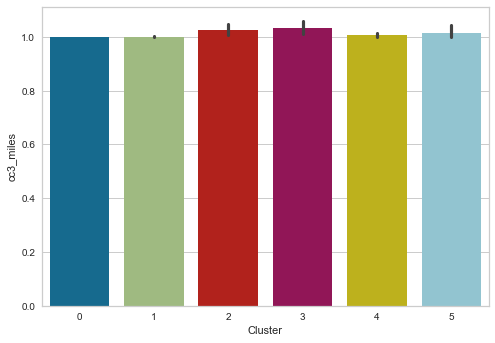

In [50]:
sns.barplot("Cluster","cc3_miles",data=df)

# Observation:
In cc3_miles equal number of data are in each cluster

<AxesSubplot:xlabel='Cluster', ylabel='Bonus_miles'>

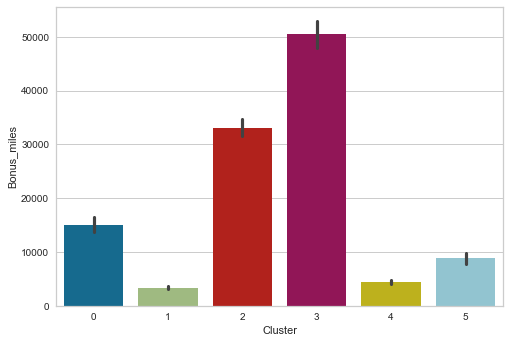

In [51]:
sns.barplot("Cluster","Bonus_miles",data=df)

# Observation
In Bonus_miles the more number of data are in cluster 3

<AxesSubplot:xlabel='Cluster', ylabel='Bonus_trans'>

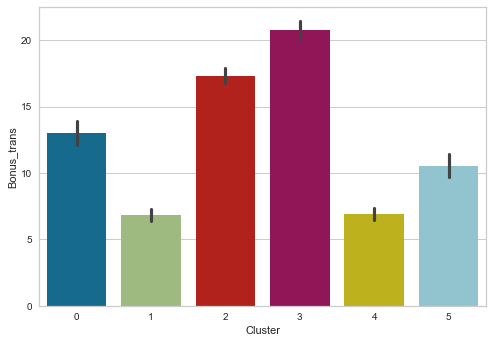

In [52]:
sns.barplot("Cluster","Bonus_trans",data=df)

# Observation:
In bonus_trans most number of data are in cluster 3

<AxesSubplot:xlabel='Cluster', ylabel='Flight_miles_12mo'>

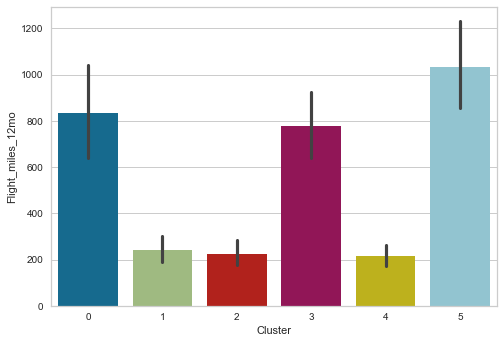

In [53]:
sns.barplot("Cluster","Flight_miles_12mo",data=df)

# Observation:
In Flight_miles_12mo most number of data are in cluster 5

<AxesSubplot:xlabel='Cluster', ylabel='Flight_trans_12'>

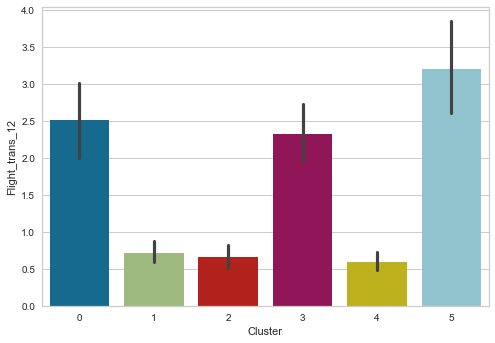

In [54]:
sns.barplot('Cluster','Flight_trans_12',data=df)

# Observation:
In Flight_trans_12 most number of data are in clsuter 5

<AxesSubplot:xlabel='Cluster', ylabel='Days_since_enroll'>

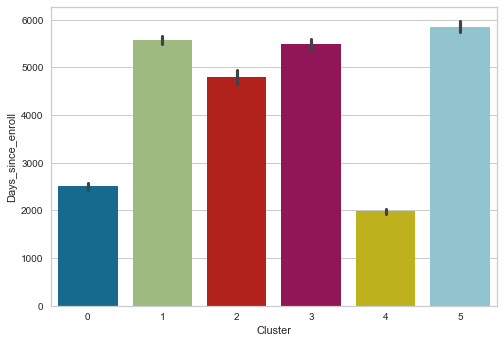

In [55]:
sns.barplot('Cluster','Days_since_enroll',data=df)

# Observation:
In Days_since_enroll most number of data are in cluster 5

<AxesSubplot:xlabel='Cluster', ylabel='Award'>

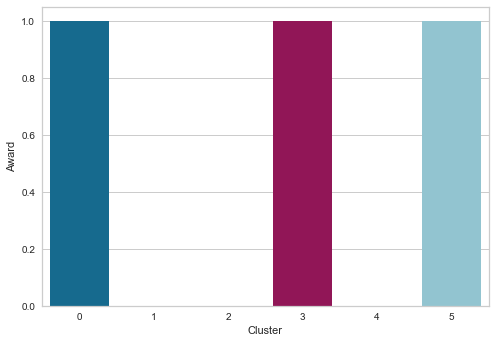

In [56]:
sns.barplot('Cluster','Award',data=df)

# Observation:
In cluster 0,cluster 3 and cluster 5 having equal number data.

# DBSCAN

In [57]:
from sklearn.cluster import DBSCAN

In [58]:
df.drop('Cluster',axis=1,inplace=True)

In [59]:
dbs = DBSCAN(min_samples = 20,eps = 0.5)
dbs.fit(df_norm)

DBSCAN(min_samples=20)

In [60]:
dbs.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [61]:
cl = pd.DataFrame(dbs.labels_,columns=['cluster'])
clustered = pd.concat([df_norm,cl],axis=1)

In [62]:
clustered

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,1
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,1
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,1
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [63]:
clustered.iloc[:,0:].groupby(['cluster']).mean()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster,,,,,,,,,,,,
-1,0.527914,0.066326,0.033180,0.196154,0.446154,0.169231,0.144976,0.267263,0.059352,0.100145,0.492547,0.507692
0,0.539805,0.034948,0.007959,0.177293,0.000000,0.000402,0.038126,0.105297,0.007352,0.012295,0.460741,0.000000
1,0.433031,0.056251,0.020548,0.418336,0.000000,0.000173,0.107605,0.179799,0.025942,0.045971,0.557601,1.000000


In [64]:
clustered.iloc[:,0:].groupby(['cluster']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster,,,,,,,,,,,,
-1,65,65,65,65,65,65,65,65,65,65,65,65
0,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486
1,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448
